
<h1>Exploratory Data Analysis(EDA) on Global Terrorism</h1>
By UPPARA NAVEEN KUMAR

GRIP Task - 4


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')

C:\Users\Naveen Kumar\AppData\Local\Temp\ipykernel_9860\3572301631.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')


In [12]:
df.shape

(181691, 135)

In [13]:
df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'Country','region_txt':'Region','provstate':'State','natlty1_txt':'nationality_of_target','weaptype1_txt':'WeaponType','nkill':'killed','nwound':'wounded'},inplace=True)

In [14]:
df=df[['year','month','day','Country','Region','city','extended','latitude','longitude','vicinity','suicide','success','State','nationality_of_target','WeaponType','killed','wounded']]

In [15]:
df.head()

,year,month,day,Country,Region,city,extended,latitude,longitude,vicinity,suicide,success,State,nationality_of_target,WeaponType,killed,wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,0,18.456792,-69.951164,0,0,1,NaN,Dominican Republic,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,0,19.371887,-99.086624,0,0,1,Federal,Belgium,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,0,15.478598,120.599741,0,0,1,Tarlac,United States,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,0,37.997490,23.762728,0,0,1,Attica,United States,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,0,33.580412,130.396361,0,0,1,Fukouka,United States,Incendiary,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   181691 non-null  int64  
 1   month                  181691 non-null  int64  
 2   day                    181691 non-null  int64  
 3   Country                181691 non-null  object 
 4   Region                 181691 non-null  object 
 5   city                   181257 non-null  object 
 6   extended               181691 non-null  int64  
 7   latitude               177135 non-null  float64
 8   longitude              177134 non-null  float64
 9   vicinity               181691 non-null  int64  
 10  suicide                181691 non-null  int64  
 11  success                181691 non-null  int64  
 12  State                  181270 non-null  object 
 13  nationality_of_target  180132 non-null  object 
 14  WeaponType             181691 non-nu

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,181691.0,2002.638997,13.259430,1.970000e+03,1991.000000,2009.000000,2014.000000,2017.000000
month,181691.0,6.467277,3.388303,0.000000e+00,4.000000,6.000000,9.000000,12.000000
day,181691.0,15.505644,8.814045,0.000000e+00,8.000000,15.000000,23.000000,31.000000
extended,181691.0,0.045346,0.208063,0.000000e+00,0.000000,0.000000,0.000000,1.000000
latitude,177135.0,23.498343,18.569242,-5.315461e+01,11.510046,31.467463,34.685087,74.633553
longitude,177134.0,-458.695653,204778.988611,-8.618590e+07,4.545640,43.246506,68.710327,179.366667
vicinity,181691.0,0.068297,0.284553,-9.000000e+00,0.000000,0.000000,0.000000,1.000000
suicide,181691.0,0.036507,0.187549,0.000000e+00,0.000000,0.000000,0.000000,1.000000
success,181691.0,0.889598,0.313391,0.000000e+00,1.000000,1.000000,1.000000,1.000000
killed,171378.0,2.403272,11.545741,0.000000e+00,0.000000,0.000000,2.000000,1570.000000


In [18]:
df.isnull().sum()

year                         0
month                        0
day                          0
Country                      0
Region                       0
city                       434
extended                     0
latitude                  4556
longitude                 4557
vicinity                     0
suicide                      0
success                      0
State                      421
nationality_of_target     1559
WeaponType                   0
killed                   10313
wounded                  16311
dtype: int64

In [19]:
df['year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: year, dtype: int64

In [20]:
df['month'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: month, dtype: int64

In [21]:
df['day'].value_counts()

15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      891
Name: day, dtype: int64

In [22]:
df['Country'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

In [23]:
df['nationality_of_target'].value_counts()

Iraq                              24113
Pakistan                          13900
India                             12098
Afghanistan                       10931
Colombia                           7922
                                  ...  
People's Republic of the Congo        1
Saba (Netherlands Antilles)           1
Tuvalu                                1
Western Sahara                        1
Marshall Islands                      1
Name: nationality_of_target, Length: 215, dtype: int64

In [24]:
killings_per_region=df.groupby(['Region'],as_index=False)['killed']
killings_per_region.sum()

,Region,killed
0,Australasia & Oceania,150.0
1,Central America & Caribbean,28708.0
2,Central Asia,1000.0
3,East Asia,1152.0
4,Eastern Europe,7415.0
5,Middle East & North Africa,137642.0
6,North America,4916.0
7,South America,28849.0
8,South Asia,101319.0
9,Southeast Asia,15637.0


In [25]:
killings_per_region.max()

,Region,killed
0,Australasia & Oceania,17.0
1,Central America & Caribbean,300.0
2,Central Asia,50.0
3,East Asia,184.0
4,Eastern Europe,344.0
5,Middle East & North Africa,1570.0
6,North America,1384.0
7,South America,275.0
8,South Asia,518.0
9,Southeast Asia,116.0


In [26]:
df['killed'].sum()

411868.0

In [27]:
df['wounded'].sum()

523869.0

In [28]:
df['casualities']=df['killed']+df['wounded']
df['casualities'].sum()

872892.0

In [29]:
df1=df.groupby('Region')['casualities'].sum()
df2=df1.to_frame()
df2.reset_index()

,Region,casualities
0,Australasia & Oceania,409.0
1,Central America & Caribbean,34530.0
2,Central Asia,2969.0
3,East Asia,10003.0
4,Eastern Europe,18239.0
5,Middle East & North Africa,329807.0
6,North America,26398.0
7,South America,43562.0
8,South Asia,234366.0
9,Southeast Asia,40841.0


In [30]:
region_and_yearwise_casualitycount=df.groupby(['Region', 'year'])['casualities'].count().head()
region_and_yearwise_casualitycount

Region                 year
Australasia & Oceania  1970    1
                       1971    1
                       1972    8
                       1973    1
                       1974    1
Name: casualities, dtype: int64

Text(0, 0.5, 'Casualities')

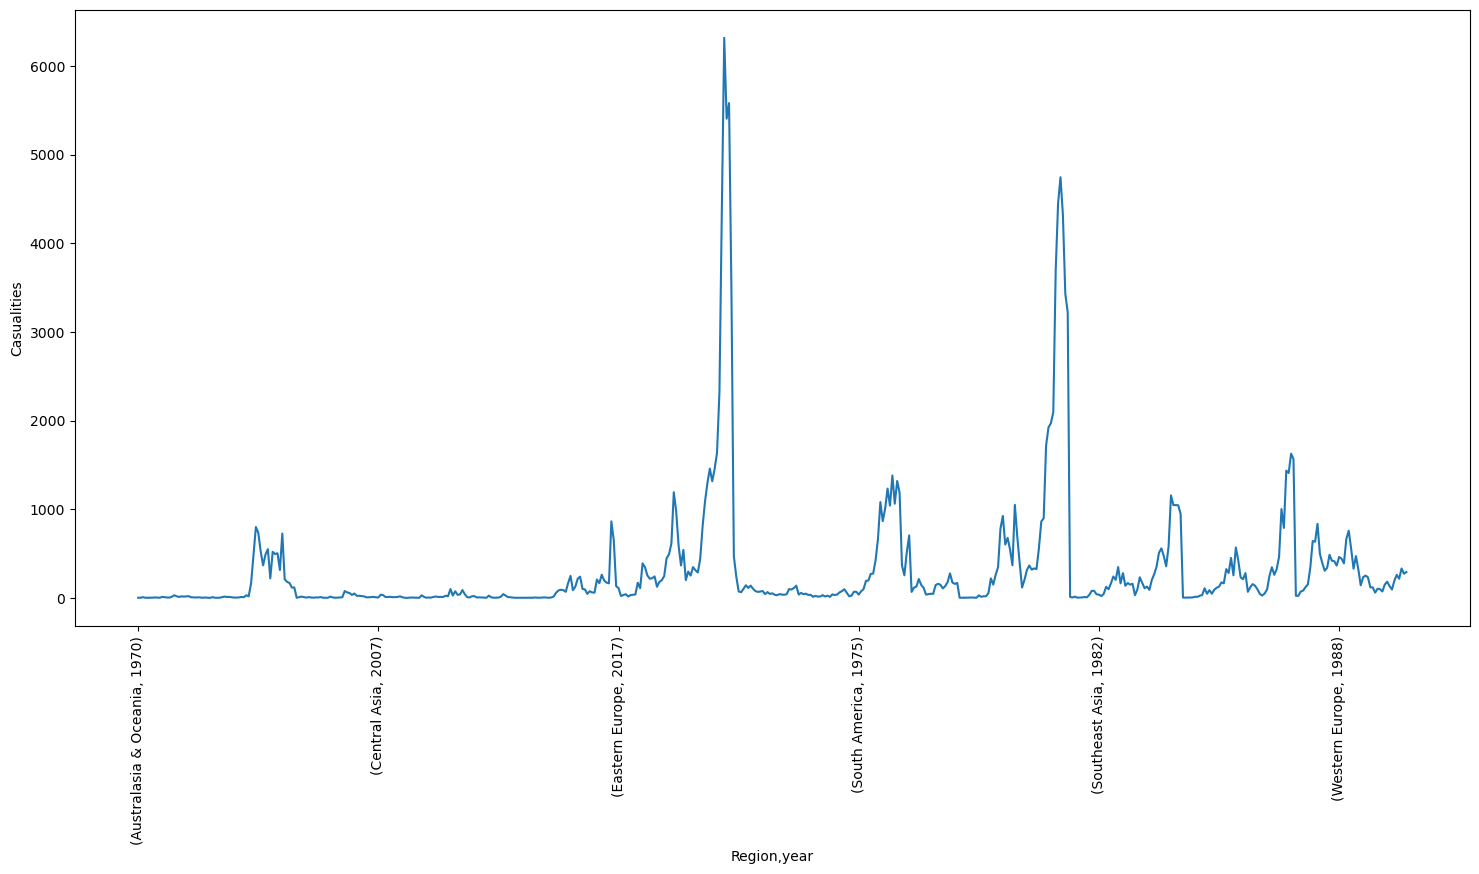

In [31]:
plt.subplots(figsize=(18,8))
df.groupby(['Region', 'year']).count()['casualities'].plot()
plt.xticks(rotation=90)
plt.ylabel("Casualities")

In [32]:
df1=df.sort_values(by='casualities',ascending=False)[:30]
worst=df1.pivot_table(index='Country',columns='year',values='casualities')
worst.fillna(0,inplace=True)

In [33]:
worst.head()

year,1982,1984,1992,1994,1995,1996,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

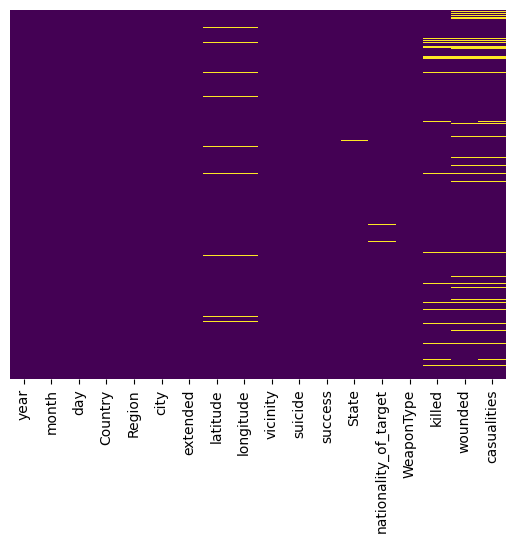

In [34]:
sns.heatmap(df.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [35]:
missing=df[df.isnull().any(axis=1)]
missing.shape

(23037, 18)

In [36]:
df.shape

(181691, 18)

In [37]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['killed'].max(),'that took place in',df.loc[df['killed'].idxmax()].Country)
print("Nationality of the maximally targetted group is:", df['nationality_of_target'].value_counts().index[0])

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq
Nationality of the maximally targetted group is: Iraq


C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


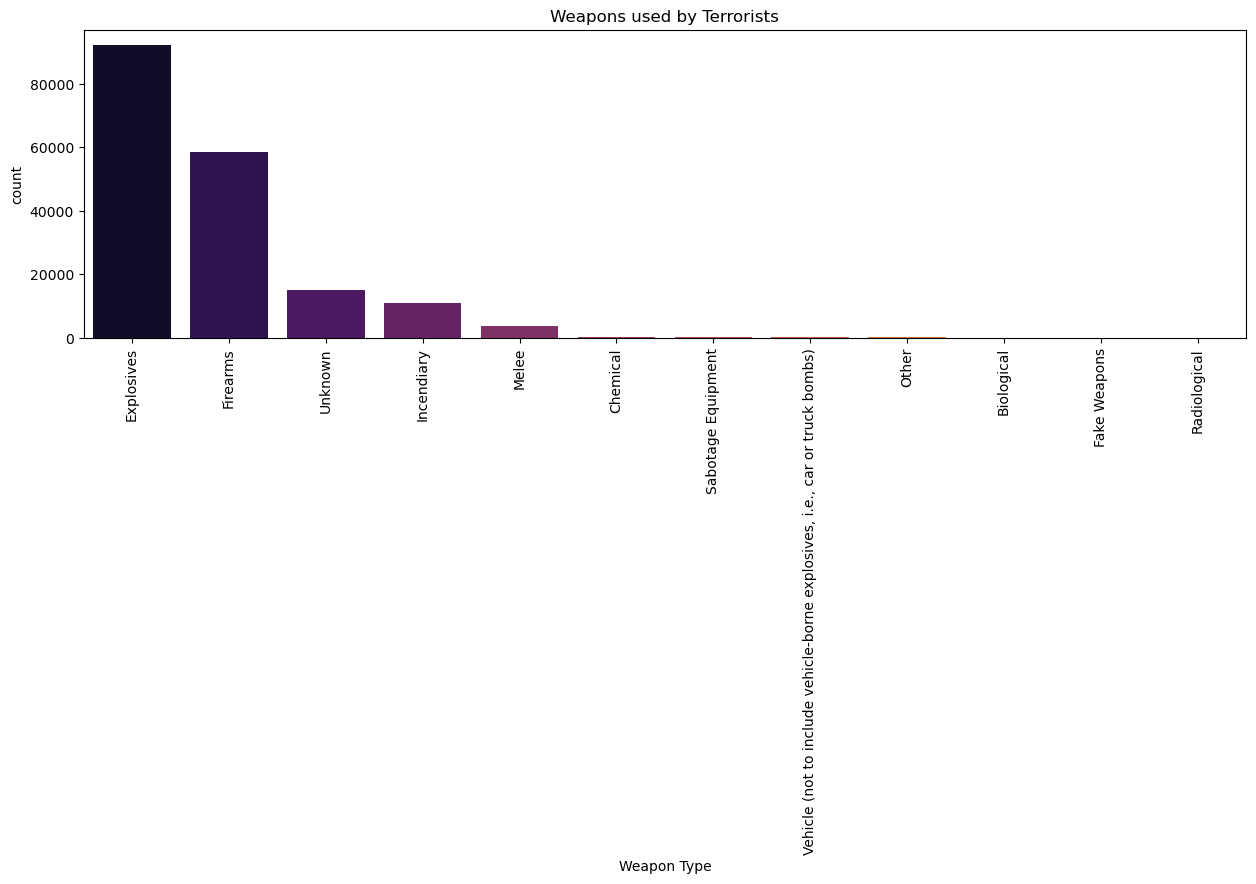

In [38]:
plt.subplots(figsize=(15,4))
sns.countplot('WeaponType',data=df,palette='inferno',order=df['WeaponType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.title('Weapons used by Terrorists')
plt.show()

0    175058
1      6633
Name: suicide, dtype: int64


C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Suicide Outcome')

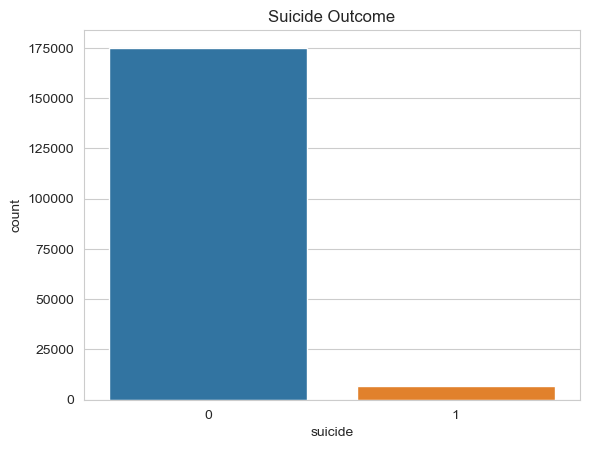

In [39]:
sns.set_style('whitegrid')
print(df.suicide.value_counts())
sns.countplot('suicide',data=df).set_title('Suicide Outcome')

1    161632
0     20059
Name: success, dtype: int64


C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Success Outcome')

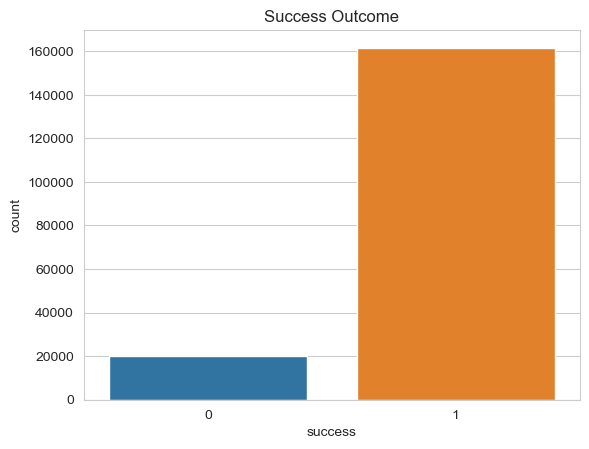

In [40]:
sns.set_style('whitegrid')
print(df.success.value_counts())
sns.countplot('success',data=df).set_title('Success Outcome')

0    173452
1      8239
Name: extended, dtype: int64


C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Success Outcome')

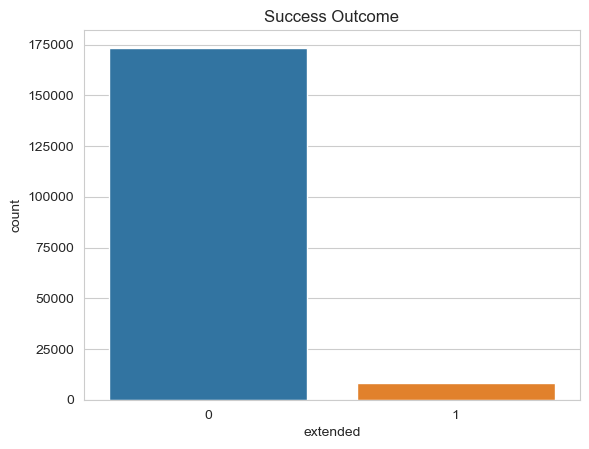

In [41]:
sns.set_style('whitegrid')
print(df.extended.value_counts())
sns.countplot('extended',data=df).set_title('Success Outcome')

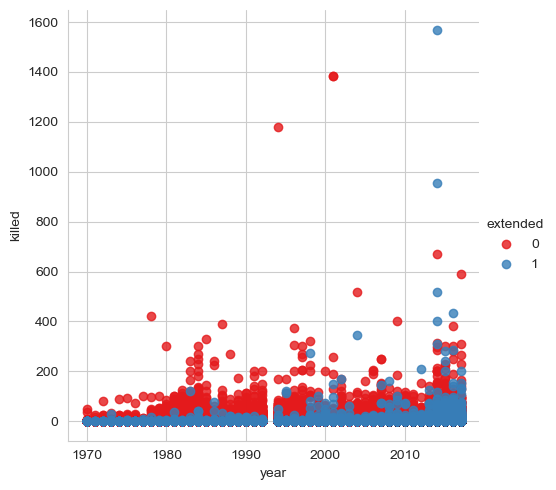

In [42]:
sns.lmplot(x='year',y='killed',data=df,fit_reg=False,hue='extended',legend=True,palette="Set1")

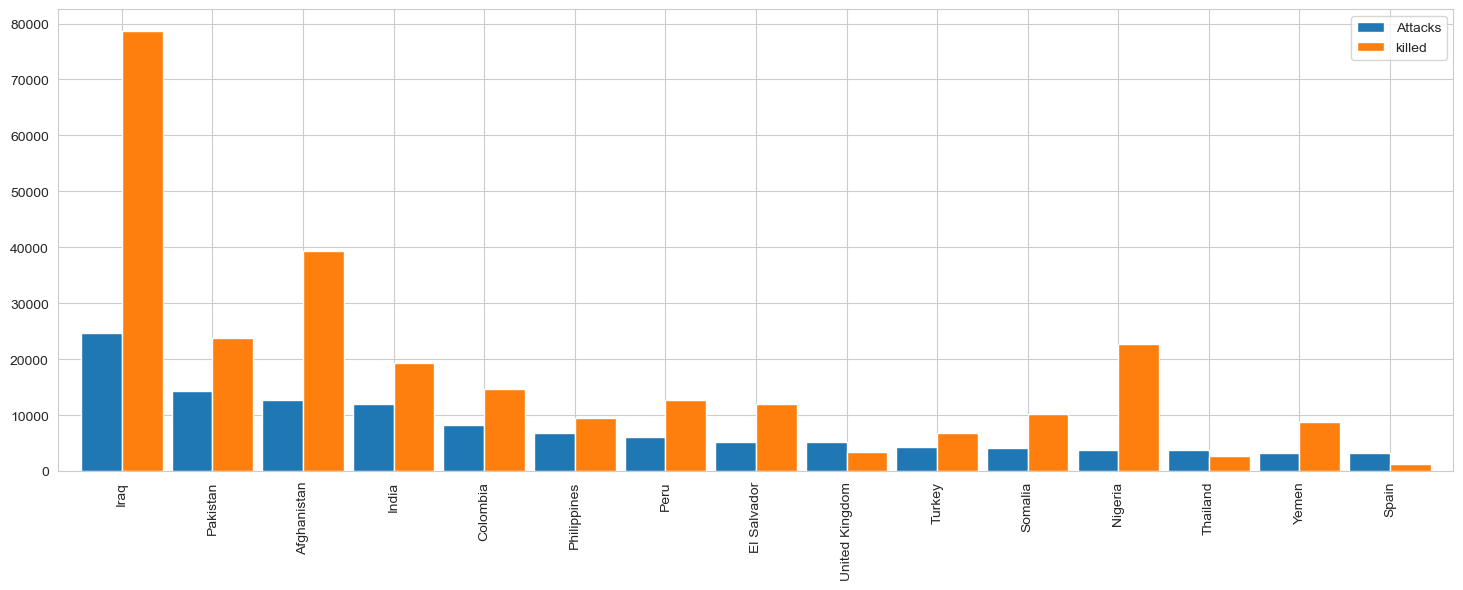

In [43]:
count=df['Country'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=df.groupby('Country')['killed'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


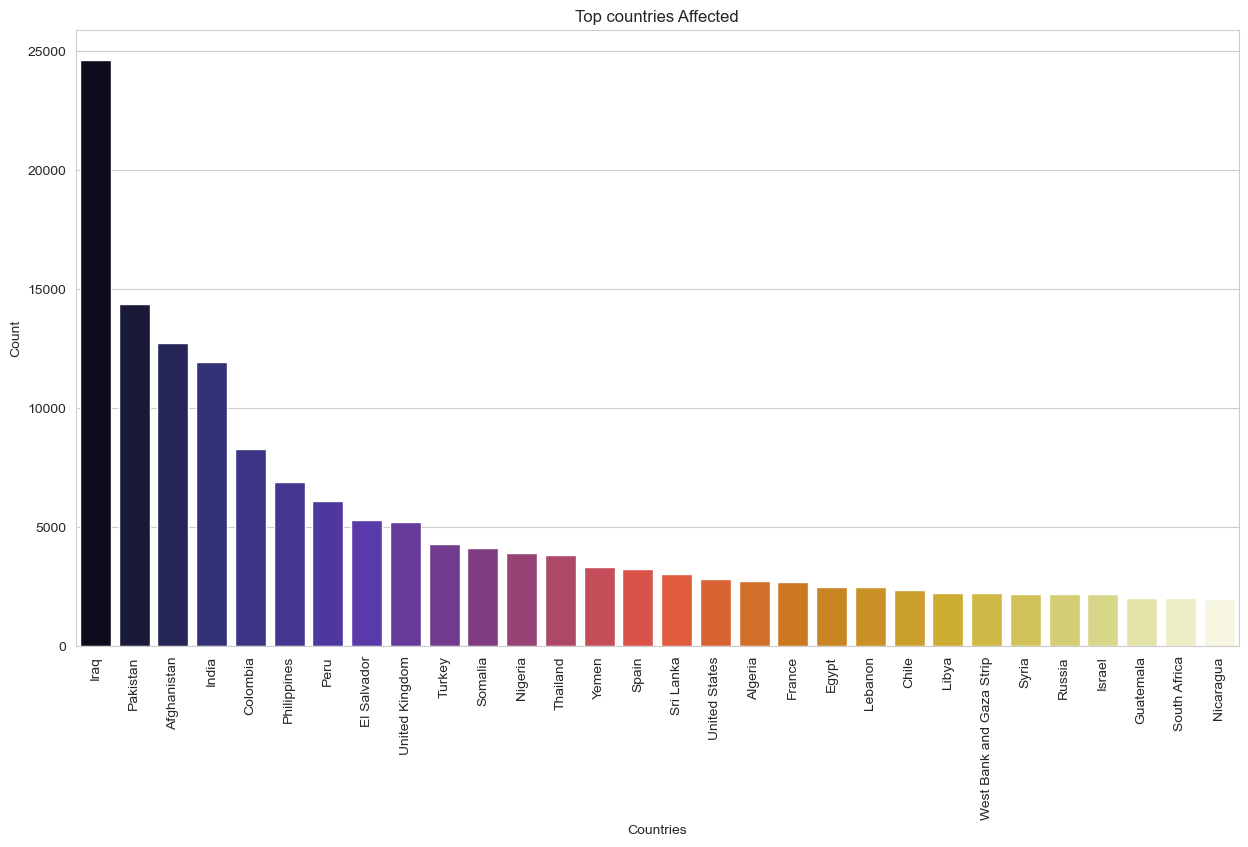

In [44]:
plt.subplots(figsize=(15,8))
sns.barplot(df['Country'].value_counts()[:30].index,df['Country'].value_counts()[:30].values,palette='CMRmap')
plt.title('Top countries Affected')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


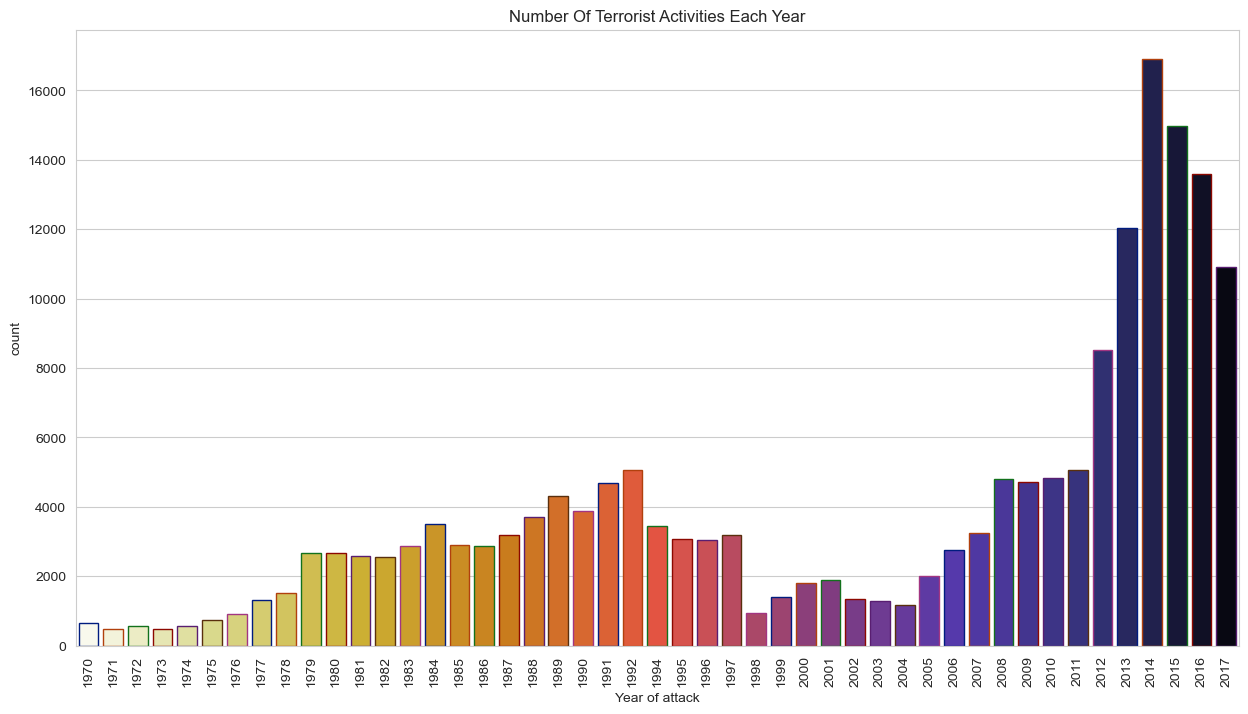

In [45]:
plt.subplots(figsize=(15,8))
sns.countplot('year',data=df,palette='CMRmap_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


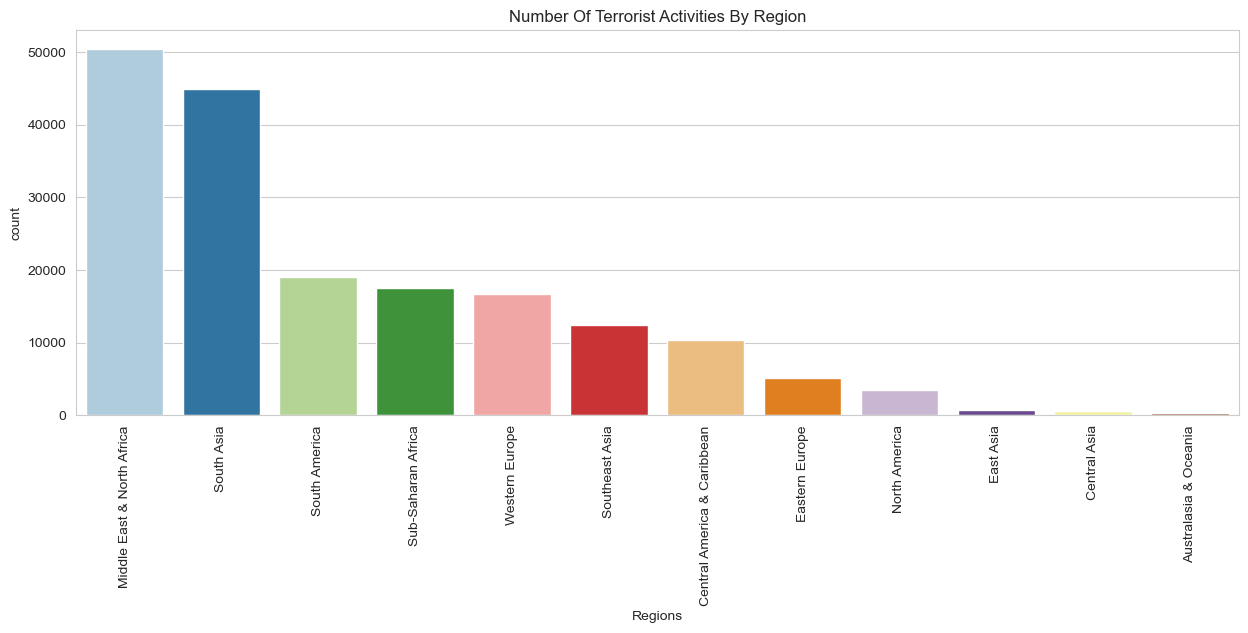

In [46]:
plt.subplots(figsize=(15,5))
sns.countplot('Region',data=df,palette='Paired',order=df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

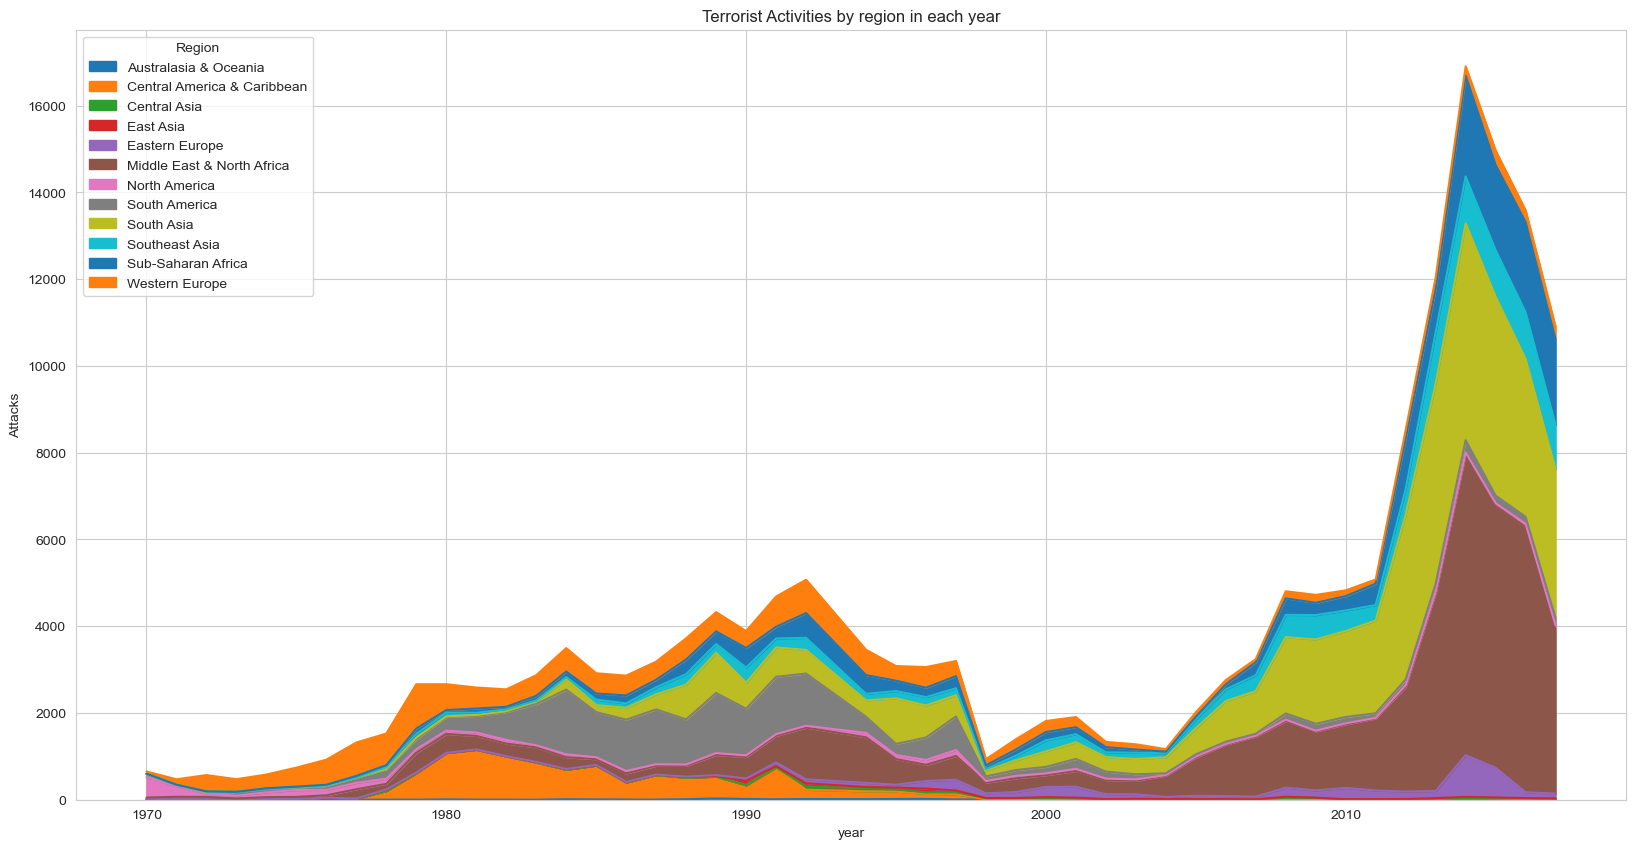

In [47]:
df_region=pd.crosstab(df.year,df.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities by region in each year')
plt.ylabel('Attacks')
plt.show()